In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(r"C:\Users\Amar Sehrawat\OneDrive\Desktop\JUPYTER\mymoviedb.csv", lineterminator = '\n')

In [44]:
df.rename(columns={'Poster_Url\r': 'Poster_Url'}, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [45]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [47]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [48]:
df.duplicated().sum()

0

In [49]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [69]:
#if 'Release_Year' in df.columns:
#   print(df['Release_Year'].head())  # Preview the column
#else:
#    print("'Release_Year' column is missing.")


0    0
1    0
2    0
3    0
4    0
Name: Release_Year, dtype: int64


Exploration Summary
• we have a dataframe consisting of 9827 rows and 9 columns
• our dataset looks a bit tidy with noMaNs nor duplicated values
• Release_Date column needs to be casted into date time and to extract only the year value
• Vote_count column needs to be casted into int and Vote_average to be casted into float
• Overview, Original Language and Poster-url wouldnt be so useful during analysis, so we will drop them.
• there is noticable outliers in popularity column.
• Genre column has comma seprated values and white spaces that needs to be handled and casted into category. Explroation summery.

In [73]:
# Ensure 'Release_Date' column exists and create 'Release_Year'
if 'Release_Date' in df.columns:
    # Convert 'Release_Date' to datetime format
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce', dayfirst=True)

    # Extract the year and handle NaN values by filling them with 0 and converting to integers
    df['Release_Year'] = df['Release_Date'].dt.year.fillna(0).astype(int)

    # Optionally drop the original 'Release_Date' column if not needed
    df.drop(columns=['Release_Date'], inplace=True)
    print("'Release_Year' column successfully created.")
else:
    print("'Release_Date' column does not exist. Cannot create 'Release_Year'.")

# Verify if 'Release_Year' column exists and print its data type
if 'Release_Year' in df.columns:
    print("Data type of 'Release_Year':", df['Release_Year'].dtypes)
else:
    print("'Release_Year' column is missing.")



'Release_Date' column does not exist. Cannot create 'Release_Year'.
'Release_Year' column is missing.


In [71]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre
0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,No Exit,2618.087,122,6.3,Thriller
3,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [53]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce').astype('Int64')
print(df['Vote_Count'].dtypes)


Int64


In [54]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce').astype('float64')
print(df['Vote_Average'].dtypes)

float64


In [74]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.0,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.0,0.000000
25%,16.127500,146.0,5.900000
50%,21.191000,444.0,6.500000
75%,35.174500,1376.0,7.100000
max,5083.954000,31077.0,10.000000


# Dropping the coulmns

In [79]:
# Drop specified columns if they exist
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(columns=cols, errors='ignore', inplace=True)

# Print the remaining columns to verify
print(df.columns)


Index(['Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre'], dtype='object')


In [80]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre
0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,No Exit,2618.087,122,6.3,Thriller
3,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [ ]:
# categorizing Vote_average column
# we would cut the vote average values and make 4 categories popular , avg, below avg, not popular

In [81]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [82]:
labels = ['not_popular','below_avg','average','popular']
categorize_col(df,'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [83]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre
0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,No Exit,2618.087,122,below_avg,Thriller
3,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [84]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [85]:
df.dropna(inplace = True )
df.isna().sum()

Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# we will split genres into a list and then explode our dataframes to have only on genre per row for each movie

In [86]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre
0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,The Batman,3827.658,1151,popular,Crime
4,The Batman,3827.658,1151,popular,Mystery


In [87]:
#casting column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         25551 non-null  object  
 1   Popularity    25551 non-null  float64 
 2   Vote_Count    25551 non-null  Int64   
 3   Vote_Average  25551 non-null  category
 4   Genre         25551 non-null  category
dtypes: Int64(1), category(2), float64(1), object(1)
memory usage: 674.7+ KB


In [89]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre
0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,The Batman,3827.658,1151,popular,Crime
4,The Batman,3827.658,1151,popular,Mystery


# DATA VISUALISATION

In [90]:
sns.set_style('whitegrid')

# What is the most frequent genre in the dataset?

In [91]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

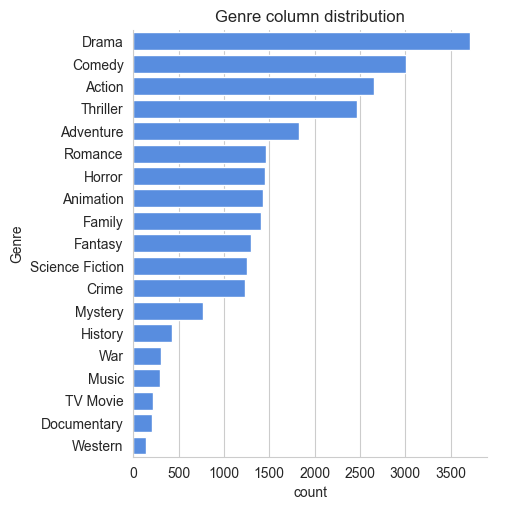

In [93]:
sns.catplot(y='Genre', data = df, kind = 'count', 
           order = df['Genre'].value_counts().index,
            color = '#4288f5')
plt.title('Genre column distribution')
plt.show()

# Which has highest votes in vote avg column?

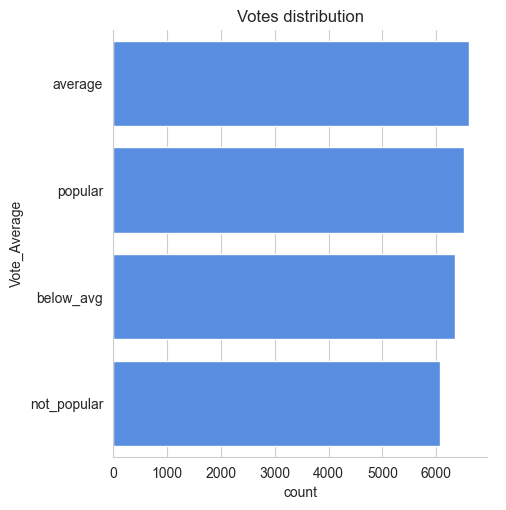

In [94]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4288f5')
plt.title('Votes distribution')
plt.show()

# Which movie got the highest popularity? What's it genre?

In [95]:
df[df['Popularity']==df['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Genre
0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# Which movie got the lowest popularity? What's it genre?


In [96]:
df[df['Popularity']==df['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,The United States vs. Billie Holiday,13.354,152,average,Music
25546,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,The United States vs. Billie Holiday,13.354,152,average,History
25548,Threads,13.354,186,popular,War
25549,Threads,13.354,186,popular,Drama
25550,Threads,13.354,186,popular,Science Fiction


CONCLUSION

Q1. What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.


Q2: What genres has highest votes?

we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.


Q3: What movie got the highest popularity ? what's its genre ?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action, Adventure and Sience Fiction.


Q4: What movie got the lowest popularity ? what's its genre?


The united states, thread' has the highest lowest rate in our dataset
and it has genres of music drama, 'war', 'sci-fi' and history.
